In [1]:
import warnings
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
from sklearn.preprocessing import StandardScaler

Data Collection and Pre Processing

In [2]:
#Ignore warning messages
warnings.filterwarnings('ignore')

In [3]:
# loading the csv data to a Pandas DataFrame
lung_data = pd.read_csv('D:\machine learning\lung_cancer.csv')

In [4]:
# print first 5 rows of the dataset
lung_data.head()
lung_data.tail()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
995,P974,31,2,3,2,4,2,3,2,3,...,4,5,6,5,5,4,6,5,4,1
996,P975,38,2,1,2,3,4,2,4,3,...,4,1,2,4,6,5,4,2,5,1
997,P976,35,1,6,8,7,7,7,6,2,...,2,7,6,5,1,9,3,4,2,1
998,P984,26,1,3,2,4,2,3,2,3,...,4,5,6,5,5,4,6,5,4,1
999,P985,37,1,1,2,3,4,2,4,3,...,4,1,2,4,6,5,4,2,5,1


In [5]:
# number of rows and columns in the dataset
lung_data.shape

(1000, 25)

In [6]:
# getting some info about the data
lung_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [7]:
lung_data['Level'].unique()

array([0, 1], dtype=int64)

In [9]:
# checking for missing values
lung_data.isnull().sum()

Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swal0ing Difficulty         0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [10]:
# statistical measures about the data
lung_data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.561000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.496513
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,1.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,1.000000


In [11]:
# find duplicate rows
duplicate_row = lung_data[lung_data.duplicated()]
print("Duplicates: ", duplicate_row.shape)

Duplicates:  (0, 25)


In [12]:
# delete duplicate rows
cleaned_lung_data = lung_data.drop_duplicates()

In [13]:
# verify rows
duplicate_row = lung_data[lung_data.duplicated()]
print("rows: ", duplicate_row.shape)

rows:  (0, 25)


In [14]:
#Drops Column that is not helpful for the analysis
lung_data.drop(['Patient Id'], axis=1, inplace=True)

In [15]:
#Renames the cleaned dataset as the finalDataSet
finalDataset = lung_data.reset_index(drop=True)

In [16]:
# checking the distribution of Condition Variable
finalDataset['Level'].value_counts()

1    561
0    439
Name: Level, dtype: int64

Chart Visualization

<AxesSubplot:>

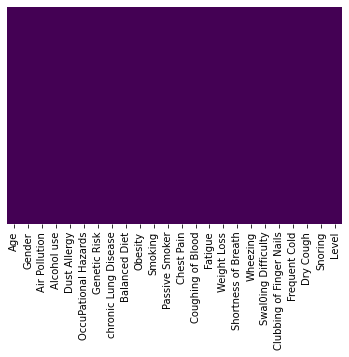

In [17]:
#Visualizing the dataset
sns.heatmap(finalDataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Level', ylabel='count'>

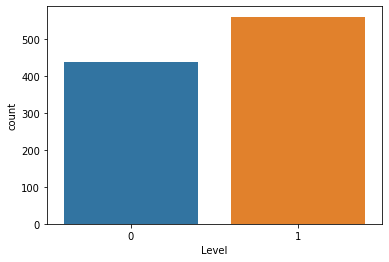

In [18]:
#plotting the outcome
sns.countplot(x='Level',data=finalDataset)

<AxesSubplot:xlabel='Age', ylabel='Density'>

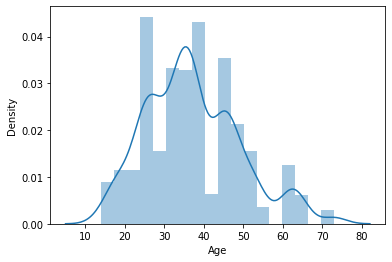

In [19]:
sns.distplot(finalDataset['Age'].dropna(),kde=True)

In [20]:
#Core relation of all the data
finalDataset.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.066396
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.141879
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.500202
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.581748
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.590758
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.548786
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.563606
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.489499
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.544295
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,0.660472


<AxesSubplot:>

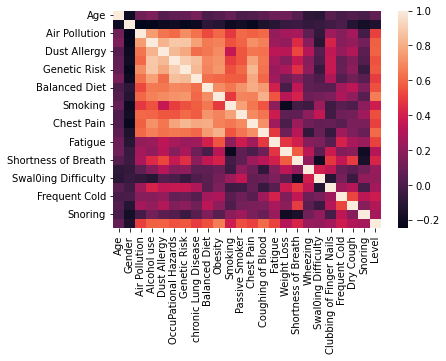

In [21]:
#Heat map for the data set
sns.heatmap(finalDataset.corr())

Splitting the Features and Target

In [22]:
x_features = finalDataset
x_features = finalDataset.drop(columns='Level', axis=1)

In [23]:
X = x_features
Y = finalDataset['Level']

In [24]:
#1st of line of the dataframe
X[0:1]

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swal0ing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4


Splitting the Data into Training data & Test Data

In [25]:
# Split data 80%-20% into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,random_state=0,stratify=Y)
print ('Training Set: %d, Test Set: %d \n' % (X_train.size, X_test.size))

Training Set: 18400, Test Set: 4600 



In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 23) (800, 23) (200, 23)


Model Training

Logistic Regression

In [27]:
# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, Y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


Model Evaluation

Accuracy Score

In [28]:
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)

In [29]:
from sklearn. metrics import classification_report

print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.70      0.81        88
           1       0.81      0.96      0.88       112

    accuracy                           0.85       200
   macro avg       0.87      0.83      0.84       200
weighted avg       0.86      0.85      0.85       200



In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('Accuracy:', accuracy_score(Y_test, y_pred))
print("Overall Precision:",precision_score(Y_test, y_pred))
print("Overall Recall:",recall_score(Y_test, y_pred))

Accuracy: 0.85
Overall Precision: 0.8059701492537313
Overall Recall: 0.9642857142857143


In [31]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
mcm = confusion_matrix(Y_test, y_pred)
print(mcm)

[[ 62  26]
 [  4 108]]


In [33]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(Y_test,y_scores[:,1])
print('roc accuracy score: ' + str(auc))

roc accuracy score: 0.9394277597402597


In [34]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.85


Building a Predictive System

In [35]:

input_data = (36,1,6,7,7,7,7,7,6,7,7,7,7,7,8,5,7,6,7,8,7,6,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# # reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


if (prediction[0]== 0):
  print('The Person does not have Lung Cancer')
else:
  print('The Person have Lung cancer')


[1]
The Person have Lung cancer


# Pickling the model

In [ ]:
# Make pickle file of our model
pickle.dump(model, open("lc_model.pkl", "wb"))

In [ ]:
load_model = pickle.load(open("lc_model.pkl", "rb"))

In [ ]:
accuracy = load_model.score(X_test,Y_test)

In [ ]:
print("Accuracy : ",accuracy)